In [2]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import glob

In [8]:
## Example processed grid
infile = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6864D_dither/results/MC_C_20191030_000363_R22_S11_15.0s_0.1x_-3.5y_processed_grid.fits'

In [11]:
## Open as a FITs table using Astropy
hdul = fits.open(infile)

## Print Main Header
print(repr(hdul[0].header))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
X0      =    2385.220108337066                                                  
Y0      =    1996.675045679444                                                  
XSTEP   =    65.34408630180397                                                  
YSTEP   =    65.35191691653706                                                  
THETA   = -0.05426371615038783                                                  
NCOLS   =                   49                                                  
NROWS   =                   49                                                  


In [12]:
## Print Table Header
print(repr(hdul[1].header))

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   80 / length of dimension 1                          
NAXIS2  =                 2401 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   10 / number of table fields                         
TTYPE1  = 'X       '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'Y       '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'DX      '        

Text(0.5, 1.0, 'Fake Star Widths')

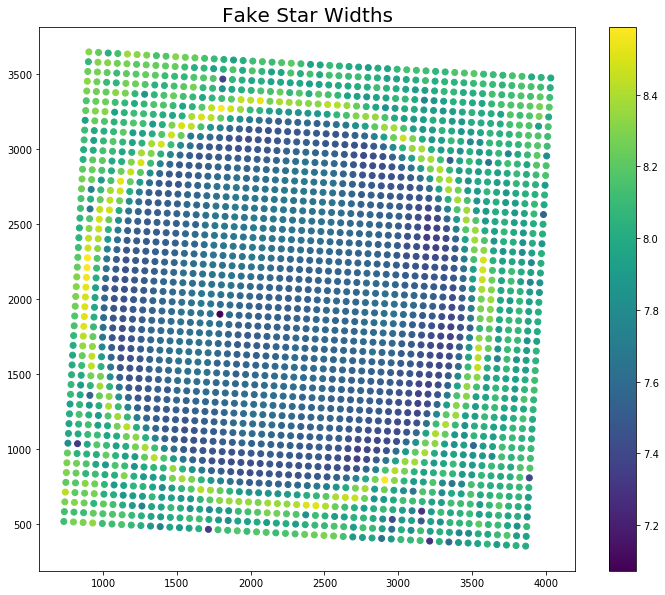

In [16]:
## Get Data table
data = hdul[1].data

## Get fake stars x/y positions and XX moment
x = data['X']
y = data['Y']
xx = data['XX']
yy = data['YY']

width = np.sqrt(xx**2.+yy**2.)

## For each star plot its mean 'width' as defined above (calculated from many measurements of each star)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
im = ax.scatter(x, y, c=width)

fig.colorbar(im)
ax.set_title('Fake Star Widths', fontsize=20)

Text(0.5, 1.0, 'Fake Star Widths')

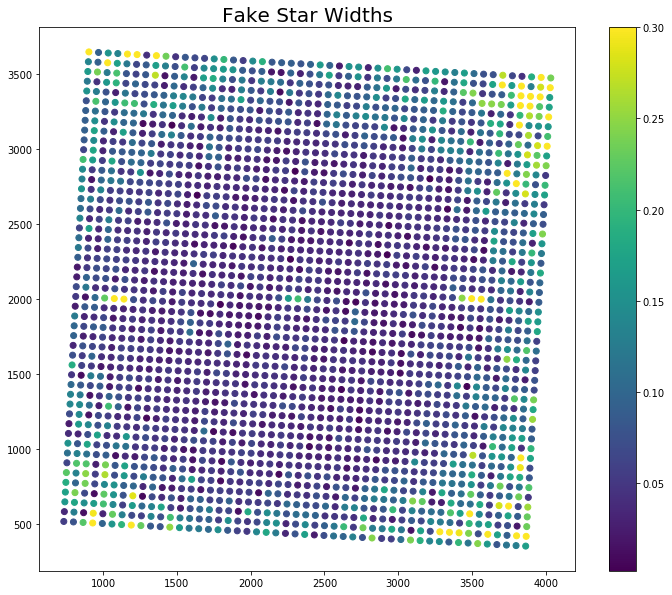

In [20]:
## Now look at the moment residuals 
## These are the changes to the fake star moments from the above mean in this particular image.
dxx = data['DXX']
dyy = data['DYY']

residual_width = np.sqrt(dxx**2.+dyy**2.)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
im = ax.scatter(x, y, c=residual_width, vmax=0.3)

fig.colorbar(im)
ax.set_title('Fake Star Widths', fontsize=20)